In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, NullFormatter, AutoMinorLocator
from matplotlib import rcParams

%matplotlib inline

In [4]:
font = {"size"   : 20}
plt.rc("font", **font)
plt.rcParams['ytick.right']

df = pd.read_csv("oxidation_state_dist.data", skiprows = 1, 
                 header = None, 
                 delimiter=" ", 
                 names=range(34))


In [5]:
df = df.drop(df.columns[0], axis=1)
tdf = df.transpose()
tdf["layer"] = tdf.index
tdf.columns = ["9-half-tet", "9-full-tet",
               "17-half-tet", "17-full-tet",
               "25-half-tet", "25-full-tet",
               "33-half-tet", "33-full-tet",
               "41-half-tet", "41-full-tet",
               "49-half-tet", "49-full-tet",
               "59-half-tet", "59-full-tet",
               "65-half-tet", "65-full-tet",
               "9-half-int", "9-full-int",
               "17-half-int", "17-full-int",
               "25-half-int", "25-full-int",
               "33-half-int", "33-full-int", 
               "41-half-int", "41-full-int", 
               "49-half-int", "49-full-int",
               "57-half-int", "57-full-int",
               "65-half-int", "65-full-int",
               "layer"]

col1 = tdf.pop("layer")
tdf.insert(0, "layer", col1)

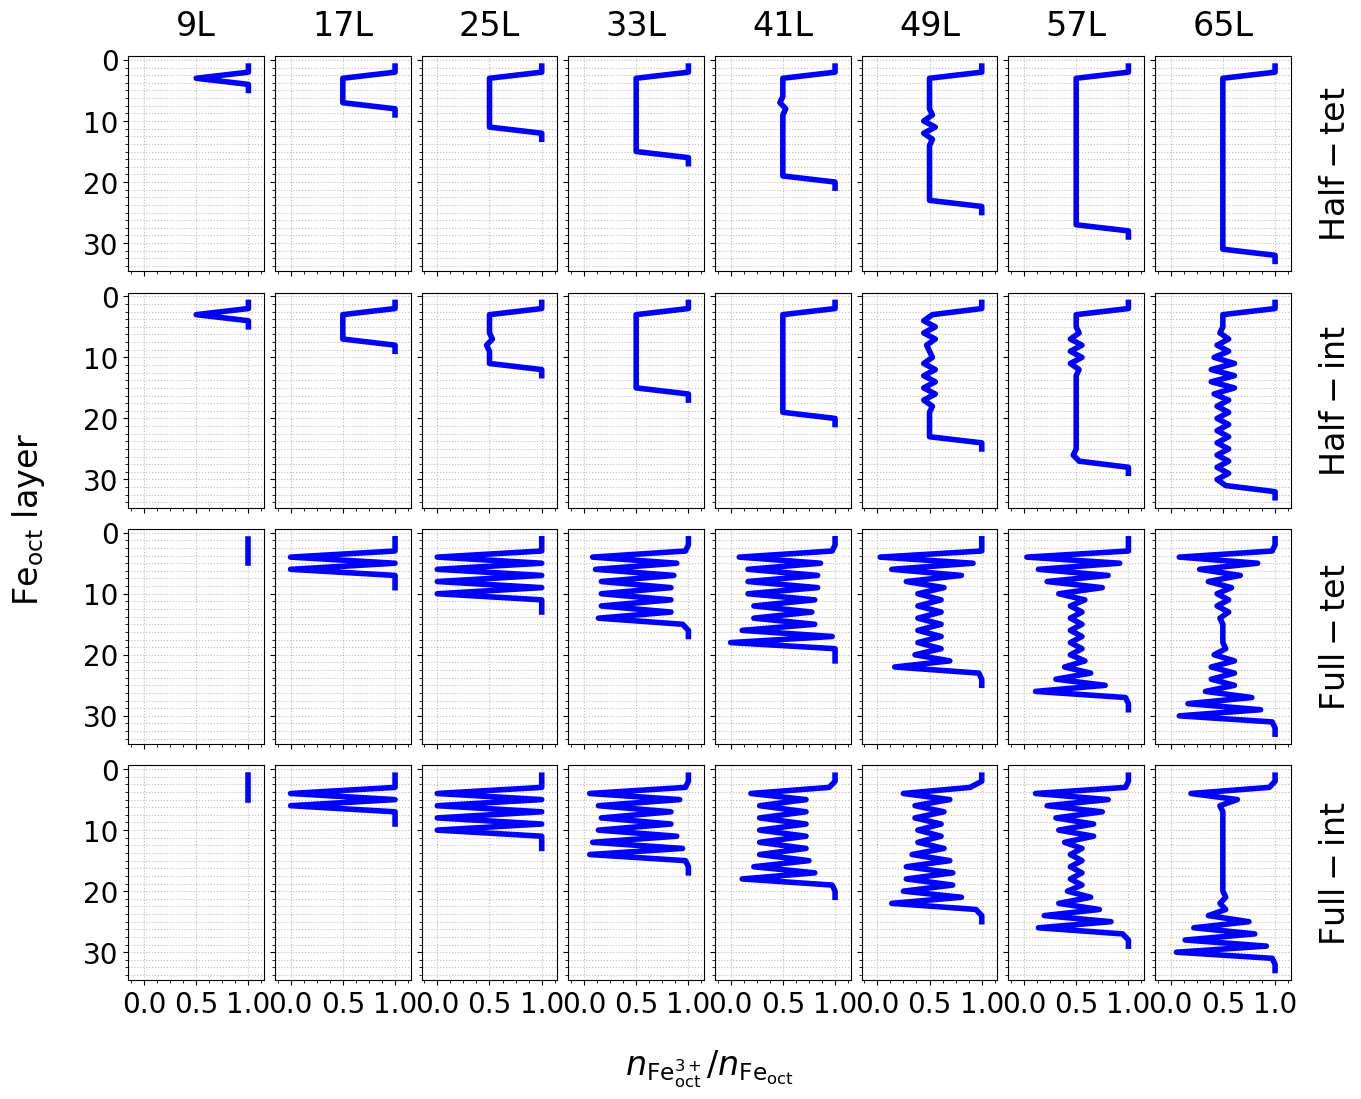

In [7]:

structures = list(tdf.columns[1::2])+list(tdf.columns[2::2])

row = 0
col = 0

fig, axis = plt.subplots(4, 8, figsize=(15, 12), facecolor="w", 
                         sharex=True, sharey=True)

fig.subplots_adjust(hspace=0.1, wspace=0.08)

axis[0, 6].set_yticks([0, 10, 20, 30])
axis[0, 0].set_xticks([0, 0.5, 1])

axis[0, 0].invert_yaxis()
#axis[0, 0].invert_xaxis()

axis[0, 0].set_xlim([-0.15, 1.15])

axis[0, 7].set_ylabel(r"$\mathrm{Half-tet}$", ha="center", fontsize=24, labelpad=20)
axis[1, 7].set_ylabel(r"$\mathrm{Half-int}$", ha="center", fontsize=24, labelpad=20)
axis[2, 7].set_ylabel(r"$\mathrm{Full-tet}$", ha="center", fontsize=24, labelpad=20)
axis[3, 7].set_ylabel(r"$\mathrm{Full-int}$", ha="center", fontsize=24, labelpad=20)
axis[0, 7].yaxis.set_label_position("right")
axis[1, 7].yaxis.set_label_position("right")
axis[2, 7].yaxis.set_label_position("right")
axis[3, 7].yaxis.set_label_position("right")

axis[0, 0].set_title("9L", fontsize=24, pad=15)
axis[0, 1].set_title("17L", fontsize=24, pad=15)
axis[0, 2].set_title("25L", fontsize=24, pad=15)
axis[0, 3].set_title("33L", fontsize=24, pad=15)
axis[0, 4].set_title("41L", fontsize=24, pad=15)
axis[0, 5].set_title("49L", fontsize=24, pad=15)
axis[0, 6].set_title("57L", fontsize=24, pad=15)
axis[0, 7].set_title("65L", fontsize=24, pad=15)

ml = AutoMinorLocator(4)
axis[0, 0].xaxis.set_minor_locator(ml)

ml = AutoMinorLocator(8)
axis[0, 0].yaxis.set_minor_locator(ml)

for system in structures:
    axis[col, row].plot(tdf[system]/36, tdf["layer"], linewidth=4, color="blue")
    axis[col, row].yaxis.grid(color='gray', linestyle='dotted', alpha=0.5, which="minor")
    axis[col, row].yaxis.grid(color='gray', linestyle='dotted', alpha=0.5, which="major")
    axis[col, row].xaxis.grid(color='gray', linestyle='dotted', alpha=0.5)
    
    row +=1
    
    if col == 1 and row == 8:
        row = 0
        col += 1

    if row == 8:
        row = 0
        col += 1

axis[1, 7].yaxis.grid(color='gray', linestyle='dotted', alpha= 0.5)
axis[1, 7].xaxis.grid(color='gray', linestyle='dotted', alpha = 0.5)

axis[3, 7].yaxis.grid(color='gray', linestyle='dotted', alpha= 0.5)
axis[3, 7].xaxis.grid(color='gray', linestyle='dotted', alpha = 0.5)

# Invisible plot for title declaration
ax0 = fig.add_subplot(111, frame_on=False)
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_xlabel(r"$n_{\mathrm{{Fe}_{oct}^{3+}}}/{n_{\mathrm{{Fe}_{oct}}}}}}$", labelpad=45, fontsize=24)
ax0.set_ylabel(r"Fe$_\mathrm{oct}$ layer", labelpad=55, fontsize=24)

plt.show()


In [5]:
structures

['9-half-tet',
 '17-half-tet',
 '25-half-tet',
 '33-half-tet',
 '41-half-tet',
 '49-half-tet',
 '9-half-int',
 '17-half-int',
 '25-half-int',
 '33-half-int',
 '41-half-int',
 '49-half-int',
 '9-full-tet',
 '17-full-tet',
 '25-full-tet',
 '33-full-tet',
 '41-full-tet',
 '49-full-tet',
 '9-full-int',
 '17-full-int',
 '25-full-int',
 '33-full-int',
 '41-full-int',
 '49-full-int']

In [8]:
fig.savefig('fe3.pdf',format='pdf', bbox_inches = "tight")
fig.savefig('fe3.png', dpi=300.0,format='png', bbox_inches = "tight")